In [1]:
# Basic Deterministic Methods
def count_sarw(L, pos=(0, 0), visited=None):
    if visited is None:
        visited = set()
    
    if L == 0:
        return 1
    
    visited.add(pos)
    
    moves = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Up, Right, Down, Left
    count = 0
    
    for dx, dy in moves:
        new_pos = (pos[0] + dx, pos[1] + dy)
        if new_pos not in visited:
            count += count_sarw(L - 1, new_pos, visited.copy())
    
    return count

L = 2  # Example walk length
print(count_sarw(L))


12


0.1937


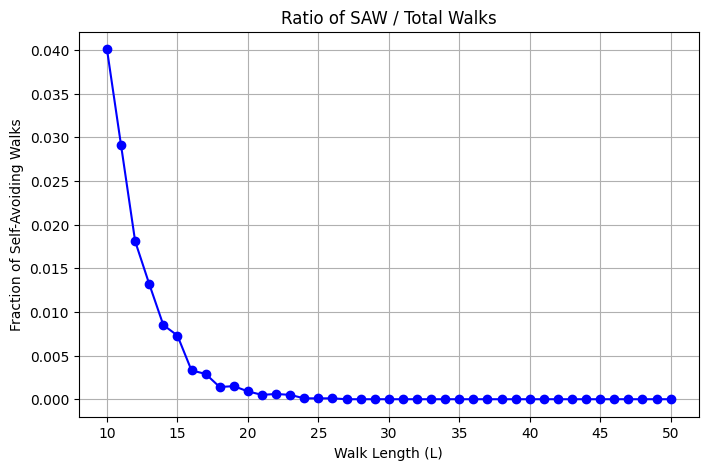

[2.8998426202860164, 2.9001061842832487, 2.8632979295788914, 2.867403131947675, 2.8455180391731325, 2.881474951719573, 2.7987693717053044, 2.836542436812217, 2.7765886808526674, 2.840751309122606, 2.8169044560049477, 2.785275036707874, 2.855040812972741, 2.874332119898483, 2.725168276231845, 2.767323883675746, 2.8068153146815313, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


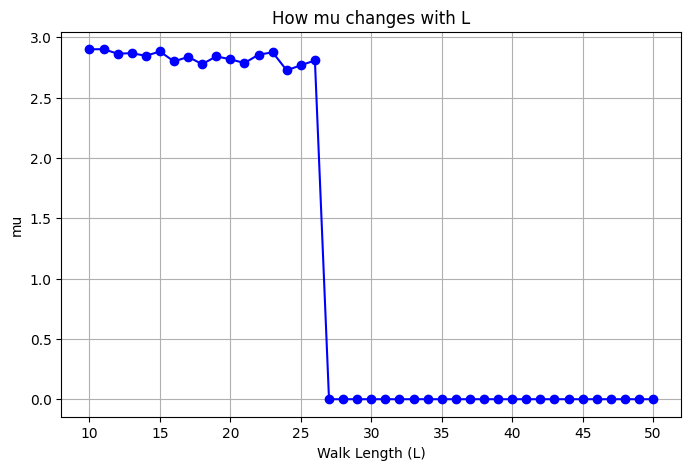

In [2]:
# Basic Monte Carlo I
import random
import matplotlib.pyplot as plt

def random_walk(L):
    pos = (0, 0)
    visited = {pos}
    moves = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Up, Right, Down, Left
    
    for _ in range(L):
        dx, dy = random.choice(moves)
        new_pos = (pos[0] + dx, pos[1] + dy)
        if new_pos in visited:
            return False  # Not a self-avoiding walk
        visited.add(new_pos)
        pos = new_pos
    
    return True  # Self-avoiding walk

def estimate_sarw_fraction(L, trials=100000):
    count_sarw = sum(random_walk(L) for _ in range(trials))
    return count_sarw / trials

L = 6  # Example walk length
trials = 10000  # Number of trials
print(estimate_sarw_fraction(L, trials))

# Plot SAW / total walk ratio for L = 10 to 50
L_values = range(10, 51)
ratios = [estimate_sarw_fraction(L, trials) for L in L_values]

plt.figure(figsize=(8, 5))
plt.plot(L_values, ratios, marker='o', linestyle='-', color='b')
plt.xlabel('Walk Length (L)')
plt.ylabel('Fraction of Self-Avoiding Walks')
plt.title('Ratio of SAW / Total Walks')
plt.grid()
plt.show()

#Values of mu as L increases
mu = []
for i, r in enumerate(ratios):
    mu.append(4 * r**(1/L_values[i]))

print(mu)

# Plot value of mu for L = 10 to 50

plt.figure(figsize=(8, 5))
plt.plot(L_values, mu, marker='o', linestyle='-', color='b')
plt.xlabel('Walk Length (L)')
plt.ylabel('mu')
plt.title('How mu changes with L')
plt.grid()
plt.show()

In [3]:
# Basic Monte Carlo II (untested)
def sophisticated_random_walk(L):
    pos = (0, 0)
    visited = {pos}
    moves = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Up, Right, Down, Left
    
    walk = [pos]
    for _ in range(L - 1):
        valid_moves = [(pos[0] + dx, pos[1] + dy) for dx, dy in moves if (pos[0] + dx, pos[1] + dy) not in visited]
        
        if valid_moves:
            pos = random.choice(valid_moves)
            visited.add(pos)
        
        walk.append(pos)
    
    return walk

def estimate_c_N(L, trials=10000):
    total_walks = 0
    self_avoiding_walks = 0
    
    for _ in range(trials):
        walk = sophisticated_random_walk(L)
        total_walks += 1
        if len(set(walk)) == L:  # Fully self-avoiding
            self_avoiding_walks += 1
    
    return self_avoiding_walks / total_walks

L = 6  # Example walk length
trials = 10000  # Number of trials
print(estimate_c_N(L, trials))

1.0
